In [1]:
import pandas as pd

links = pd.read_csv("links.csv")  
movies = pd.read_csv("movies.csv")    
tags = pd.read_csv("tags.csv")  
ratings = pd.read_csv("ratings.csv")  


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="yourdatabase"
)

cursor = conn.cursor()

# # Execute a query
# cursor.execute("SELECT * FROM your_table")

# # Fetch results
# rows = cursor.fetchall()
# for row in rows:
#     print(row)

# # Close connection
# cursor.close()
# conn.close()


ModuleNotFoundError: No module named 'mysql'

In [4]:
from flask_mysqldb import MySQL
import MySQLdb.cursors


In [1]:
import MySQLdb

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)

cursor = conn.cursor()

cursor.execute("SELECT m.movieId, m.title, m.genres, AVG(r.rating) AS avg_rating, COUNT(r.rating) AS num_ratings FROM ratings r JOIN movies m ON r.movieId = m.movieId GROUP BY m.movieId, m.title, m.genres  ORDER BY avg_rating DESC LIMIT 10"
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

# HAVING COUNT(r.rating) >= 50

(230, 'Dolores Claiborne (1995)', 'Drama|Thriller', 5.0, 2)
(477, "What's Love Got to Do with It? (1993)", 'Drama|Musical', 5.0, 2)
(445, 'Fatal Instinct (1993)', 'Comedy', 5.0, 1)
(223, '6336270', '454774', 5.0, 4)
(68, 'Two Bits (1995)', '105759', 5.0, 2)
(244, 'Gumby: The Movie (1995)', 'Animation|Children', 5.0, 1)
(223, 'Clerks (1994)', 'Comedy', 5.0, 4)
(448, 'Fearless (1993)', 'Drama', 5.0, 2)
(246, 'Hoop Dreams (1994)', 'Documentary', 4.666666666666667, 3)
(172, 'Johnny Mnemonic (1995)', 'Action|Sci-Fi|Thriller', 4.5, 2)


In [2]:
import MySQLdb

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)

cursor = conn.cursor()

cursor.execute("""SELECT m.movieId, m.title, COUNT(r.rating) AS num_ratings
FROM ratings r
JOIN movies m ON r.movieId = m.movieId
GROUP BY m.movieId, m.title
ORDER BY num_ratings DESC
LIMIT 10;
"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

# HAVING COUNT(r.rating) >= 50

(541, 'Blade Runner (1982)', 88)
(318, 'Shawshank Redemption, The (1994)', 77)
(296, 'Pulp Fiction (1994)', 74)
(260, '1772408', 68)
(480, 'Jurassic Park (1993)', 58)
(527, "Schindler's List (1993)", 56)
(344, 'Ace Ventura: Pet Detective (1994)', 52)
(1, 'Toy Story (1995)', 47)
(110, 'Braveheart (1995)', 42)
(110, '3758708', 42)


In [7]:

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)
cursor = conn.cursor()

cursor.execute("""SELECT m.genres, AVG(r.rating) AS avg_rating, COUNT(r.rating) AS num_ratings FROM ratings r JOIN movies m ON r.movieId = m.movieId GROUP BY m.genres ORDER BY avg_rating DESC
LIMIT 10;

"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

('128571', 5.0, 3)
('182030', 5.0, 2)
('105759', 5.0, 2)
('Animation|Children', 5.0, 1)
('105552', 5.0, 2)
('Adventure|Drama|War', 5.0, 2)
('Horror|Thriller', 4.666666666666667, 3)
('180244', 4.5, 2)
('196649', 4.375, 8)
('35120', 4.333333333333333, 3)


In [9]:

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)
cursor = conn.cursor()

cursor.execute("""SELECT rating, COUNT(*) AS count
FROM ratings
GROUP BY rating
ORDER BY rating DESC


"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

(5.0, 4657)
(4.5, 3146)
(4.0, 7574)
(3.5, 3900)
(3.0, 5053)
(2.5, 1369)
(2.0, 1703)
(1.5, 407)
(1.0, 864)
(0.5, 366)


In [10]:

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)
cursor = conn.cursor()

cursor.execute("""SELECT userId, COUNT(movieId) AS movies_rated, AVG(rating) AS avg_rating
FROM ratings
GROUP BY userId
ORDER BY movies_rated DESC
LIMIT 10;



"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

(149, 1564, 3.266624040920716)
(305, 1406, 3.7304409672830725)
(227, 891, 3.4079685746352415)
(224, 574, 3.4930313588850175)
(137, 522, 3.9980842911877397)
(301, 516, 3.746124031007752)
(250, 512, 3.0224609375)
(304, 507, 3.358974358974359)
(24, 497, 3.4708249496981893)
(44, 483, 3.420289855072464)


In [11]:

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)
cursor = conn.cursor()

cursor.execute("""SELECT r1.userId, r2.userId AS similar_user, COUNT(*) AS common_movies
FROM ratings r1
JOIN ratings r2 ON r1.movieId = r2.movieId AND r1.userId <> r2.userId
WHERE r1.rating >= 4 AND r2.rating >= 4
GROUP BY r1.userId, r2.userId
ORDER BY common_movies DESC;




"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

(149, 305, 209)
(305, 149, 209)
(305, 227, 187)
(227, 305, 187)
(123, 305, 151)
(137, 305, 151)
(305, 123, 151)
(305, 137, 151)
(149, 227, 140)
(227, 149, 140)
(53, 305, 125)
(305, 53, 125)
(305, 30, 122)
(30, 305, 122)
(301, 305, 121)
(305, 301, 121)
(123, 227, 117)
(227, 123, 117)
(305, 79, 116)
(149, 123, 116)
(123, 149, 116)
(79, 305, 116)
(263, 305, 111)
(305, 263, 111)
(149, 53, 108)
(53, 149, 108)
(305, 24, 105)
(24, 305, 105)
(237, 305, 104)
(305, 237, 104)
(305, 210, 101)
(79, 227, 101)
(227, 79, 101)
(210, 305, 101)
(149, 137, 100)
(137, 149, 100)
(131, 305, 99)
(305, 131, 99)
(305, 44, 97)
(44, 305, 97)
(53, 227, 95)
(227, 53, 95)
(149, 224, 93)
(224, 149, 93)
(44, 149, 91)
(149, 44, 91)
(149, 79, 89)
(79, 149, 89)
(305, 304, 88)
(304, 305, 88)
(305, 206, 85)
(149, 210, 85)
(123, 79, 85)
(79, 123, 85)
(210, 149, 85)
(44, 227, 85)
(227, 44, 85)
(206, 305, 85)
(53, 263, 84)
(30, 301, 84)
(223, 149, 84)
(149, 223, 84)
(301, 30, 84)
(263, 53, 84)
(227, 30, 82)
(30, 227, 82)
(263

In [12]:

conn = MySQLdb.connect(
    host="localhost",
    user="root",
    password="Sudheer@123",
    database="movie"
)
cursor = conn.cursor()

cursor.execute("""WITH SimilarUsers AS (
    SELECT r1.userId, r2.userId AS similar_user, r2.movieId, r2.rating
    FROM ratings r1
    JOIN ratings r2 ON r1.movieId = r2.movieId AND r1.userId <> r2.userId
    WHERE r1.rating >= 4 AND r2.rating >= 4
)
SELECT m.title, AVG(su.rating) AS avg_rating
FROM SimilarUsers su
JOIN movies m ON su.movieId = m.movieId
GROUP BY m.movieId, m.title
ORDER BY avg_rating DESC
LIMIT 10;





"""
)

rows = cursor.fetchall()
for row in rows:
    print(row)

# Close connection
cursor.close()
conn.close()

('3973814', 5.0)
('0138758', 5.0)
('Chungking Express (Chung Hing sam lam) (1994)', 5.0)
('Sabrina (1995)', 5.0)
('Don Juan DeMarco (1995)', 5.0)
('1678050', 5.0)
('Hard Target (1993)', 5.0)
('Richard III (1995)', 5.0)
('Six Degrees of Separation (1993)', 5.0)
('Congo (1995)', 4.8)


In [16]:
import pandas as pd

# Load datasets
links = pd.read_csv("links.csv")  # movieId, imdbId, tmdbId
movies = pd.read_csv("movies.csv")  # movieId, title, genres
genome_scores = pd.read_csv("genome-scores.csv")  # movieId, tagId, relevance
genome_tags = pd.read_csv("genome-tags.csv")  # tagId, tag
tags = pd.read_csv("tags.csv")  # userId, movieId, tag, timestamp
ratings = pd.read_csv("ratings.csv")  # userId, movieId, rating, timestamp


In [13]:
import pandas as pd

# Load datasets
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

# Check structure
print(ratings.head())
print(movies.head())


   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate

# Define rating scale
reader = Reader(rating_scale=(0.5, 5.0))

# Load dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Use Singular Value Decomposition (SVD)-0
model = SVD()
model.fit(trainset)

# Evaluate model performance
cross_validate(model, data, cv=5, verbose=True)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\sudhe\Documents\abc\env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\sudhe\Documents\abc\env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\sudhe\Documents\abc\env\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "c:\Users\sudhe

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert genres into a TF-IDF matrix
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies["genres"].fillna(""))

# Compute similarity scores
cosine_sim = cosine_similarity(tfidf_matrix)

# Function to get content-based recommendations
def get_content_based_recommendations(title, movies_df, cosine_sim_matrix, n=10):
    idx = movies_df[movies_df["title"] == title].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_n_movies = [movies_df.iloc[i[0]].title for i in sim_scores[1:n+1]]
    return top_n_movies

# Example: Recommend movies similar to "Toy Story (1995)"
print(get_content_based_recommendations("Toy Story (1995)", movies, cosine_sim, 10))


ImportError: cannot import name 'fastCopyAndTranspose' from 'numpy.core._multiarray_umath' (c:\Users\sudhe\Documents\abc\env\Lib\site-packages\numpy\core\_multiarray_umath.py)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv("movies.csv")  # Columns: movieId, title, genres
ratings = pd.read_csv("ratings.csv")  # Columns: userId, movieId, rating, timestamp
tags = pd.read_csv("tags.csv")  # Columns: userId, movieId, tag, timestamp
links = pd.read_csv("links.csv")  # Columns: movieId, imdbId, tmdbId

# Merge ratings with movies
df = pd.merge(ratings, movies, on="movieId")


In [26]:
movie_ratings = pd.merge(ratings, movies, on='movieId')
# Assuming each movie has a single genre (or a primary genre for simplicity)
movie_ratings['main_genre'] = movie_ratings['genres'].str.split('|').str[0]  # Select primary genre
genre_ratings = movie_ratings.groupby('main_genre')['rating'].mean().sort_values(ascending=False)

print(genre_ratings.head(10))  # Top 10 genres by average rating


main_genre
Film-Noir      4.080357
Mystery        3.855533
Crime          3.834191
Documentary    3.829557
Western        3.658940
Musical        3.652985
Drama          3.647205
Animation      3.578266
Adventure      3.566029
War            3.555556
Name: rating, dtype: float64


In [28]:
top_movies_per_genre = movie_ratings.groupby(['main_genre', 'title'])['rating'].mean().unstack().fillna(0)

# Find the top-rated movie in each genre
top_movies_per_genre = top_movies_per_genre.max(axis=1).sort_values(ascending=False)

print(top_movies_per_genre.head(10))  # Top-rated movies across all genres


main_genre
(no genres listed)    5.0
Action                5.0
Adventure             5.0
Animation             5.0
Children              5.0
Comedy                5.0
Crime                 5.0
Documentary           5.0
Drama                 5.0
Fantasy               5.0
dtype: float64


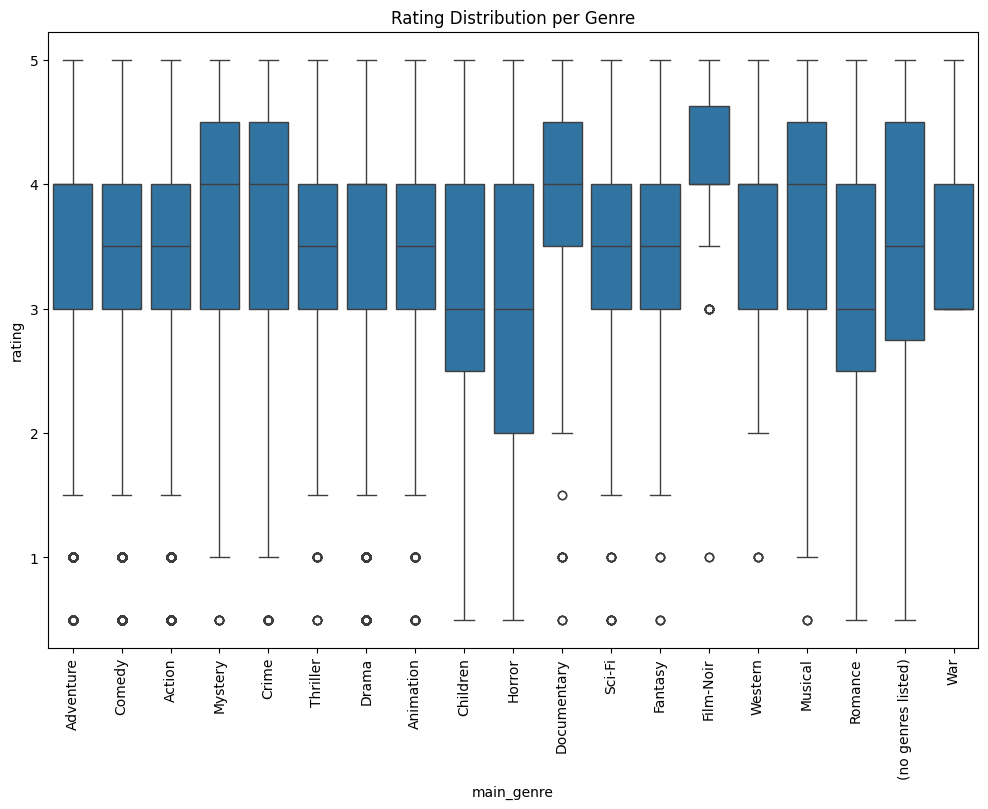

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(x='main_genre', y='rating', data=movie_ratings)
plt.xticks(rotation=90)
plt.title('Rating Distribution per Genre')
plt.show()


In [32]:
# Group by genre and calculate the total number of ratings per genre
genre_popularity = movie_ratings.groupby('main_genre')['rating'].count().reset_index()

# Sort by rating count
genre_popularity_sorted = genre_popularity.sort_values(by='rating', ascending=False)

print(genre_popularity_sorted.head(10))


     main_genre  rating
1        Action   30635
5        Comedy   25217
8         Drama   17068
2     Adventure   10344
6         Crime    6610
3     Animation    2549
11       Horror    2461
4      Children    2097
7   Documentary    1015
13      Mystery     976


In [3]:
print(df['rating'].describe())


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


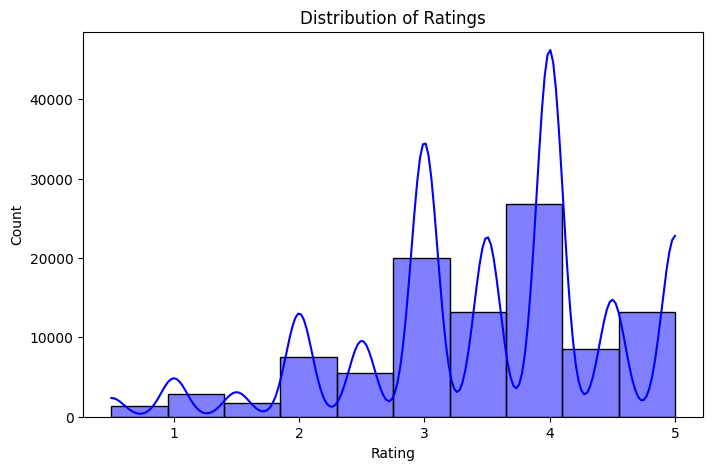

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


In [5]:
top_rated = df.groupby('title').agg({'rating': ['mean', 'count']})
top_rated.columns = ['avg_rating', 'rating_count']
top_rated = top_rated[top_rated['rating_count'] > 50].sort_values(by="avg_rating", ascending=False)

print(top_rated.head(10))


                                                    avg_rating  rating_count
title                                                                       
Shawshank Redemption, The (1994)                      4.429022           317
Godfather, The (1972)                                 4.289062           192
Fight Club (1999)                                     4.272936           218
Cool Hand Luke (1967)                                 4.271930            57
Dr. Strangelove or: How I Learned to Stop Worry...    4.268041            97
Rear Window (1954)                                    4.261905            84
Godfather: Part II, The (1974)                        4.259690           129
Departed, The (2006)                                  4.252336           107
Goodfellas (1990)                                     4.250000           126
Casablanca (1942)                                     4.240000           100


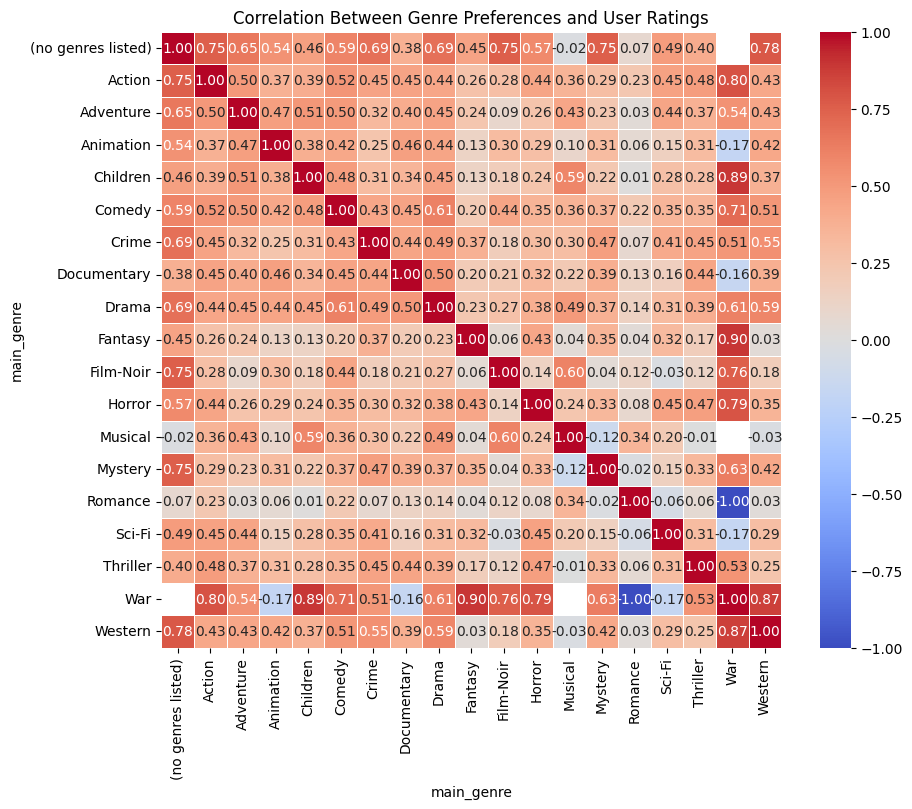

In [36]:
# Create a user-genre matrix of ratings
user_genre_matrix = movie_ratings.pivot_table(index='userId', columns='main_genre', values='rating')

# Calculate correlation between genre preferences and user ratings
genre_correlation = user_genre_matrix.corr()

# Display the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(genre_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Genre Preferences and User Ratings')
plt.show()


In [6]:
most_rated = df['title'].value_counts().head(10)
print(most_rated)


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


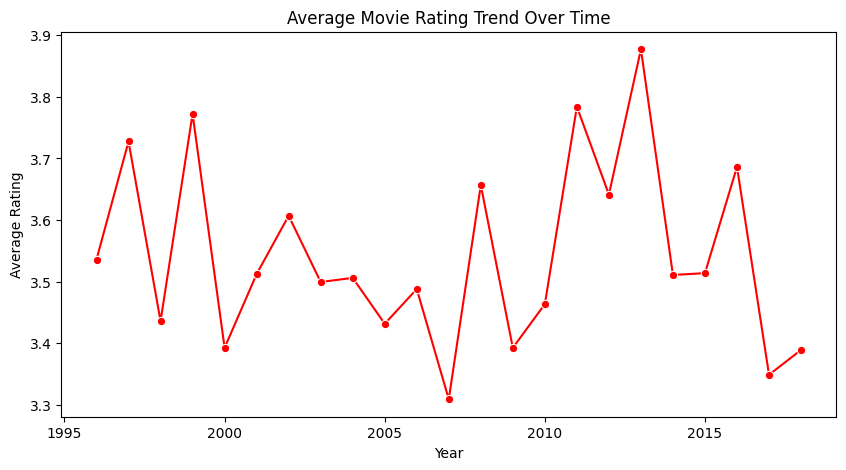

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['timestamp'].dt.year

yearly_ratings = df.groupby('year')['rating'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Movie Rating Trend Over Time")
plt.show()


In [8]:
movie_stats = df.groupby('title').agg({'rating': ['mean', 'std', 'count']})
movie_stats.columns = ['avg_rating', 'rating_std', 'rating_count']
consistent_movies = movie_stats[(movie_stats['rating_count'] > 50) & (movie_stats['rating_std'] < 0.5)]
consistent_movies = consistent_movies.sort_values(by='avg_rating', ascending=False).head(10)

print(consistent_movies)


Empty DataFrame
Columns: [avg_rating, rating_std, rating_count]
Index: []


In [9]:
controversial_movies = movie_stats[(movie_stats['rating_count'] > 50) & (movie_stats['rating_std'] > 1.0)]
controversial_movies = controversial_movies.sort_values(by='rating_std', ascending=False).head(10)

print(controversial_movies)


                                              avg_rating  rating_std  \
title                                                                  
Blair Witch Project, The (1999)                 2.796875    1.373556   
First Knight (1995)                             3.083333    1.298584   
Austin Powers: The Spy Who Shagged Me (1999)    3.198347    1.215318   
Moulin Rouge (2001)                             3.590909    1.198343   
Scream (1996)                                   3.200000    1.196008   
Mars Attacks! (1996)                            3.093023    1.179510   
Cable Guy, The (1996)                           2.805556    1.175283   
Nutty Professor, The (1996)                     2.731707    1.173775   
Rushmore (1998)                                 3.544643    1.157100   
Sense and Sensibility (1995)                    3.776119    1.145755   

                                              rating_count  
title                                                       
Blair Witch P

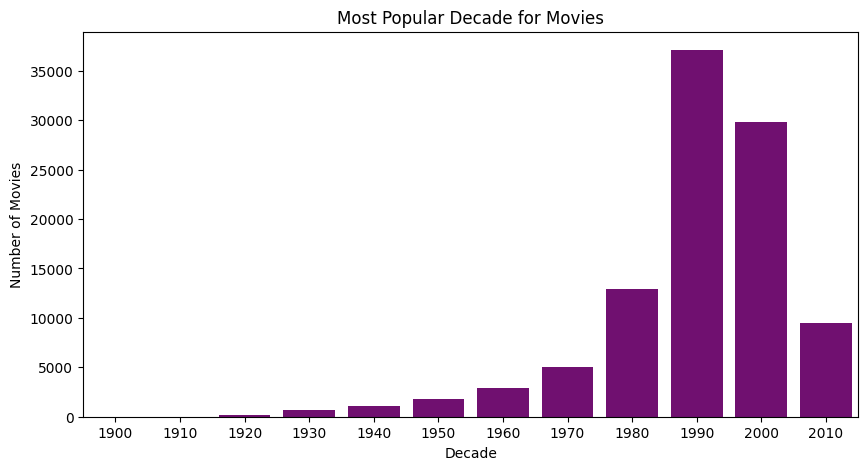

In [10]:
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)
df['decade'] = (df['release_year'] // 10) * 10

decade_counts = df['decade'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=decade_counts.index.astype(int), y=decade_counts.values, color='purple')
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Most Popular Decade for Movies")
plt.show()


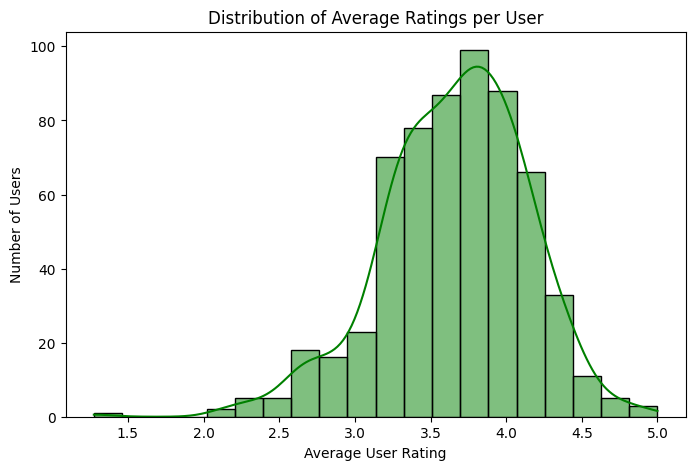

In [11]:
user_ratings = df.groupby('userId')['rating'].mean()
plt.figure(figsize=(8,5))
sns.histplot(user_ratings, bins=20, kde=True, color='green')
plt.xlabel("Average User Rating")
plt.ylabel("Number of Users")
plt.title("Distribution of Average Ratings per User")
plt.show()


In [12]:
genre_engagement = df.groupby('main_genre')['rating'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
print(genre_engagement.head(10))


KeyError: 'main_genre'

In [13]:
user_activity = df.groupby('userId')['rating'].count()
inactive_users = user_activity[user_activity < 5].count()  # Users who watched < 5 movies

print(f"Users who watched fewer than 5 movies: {inactive_users}")


Users who watched fewer than 5 movies: 0


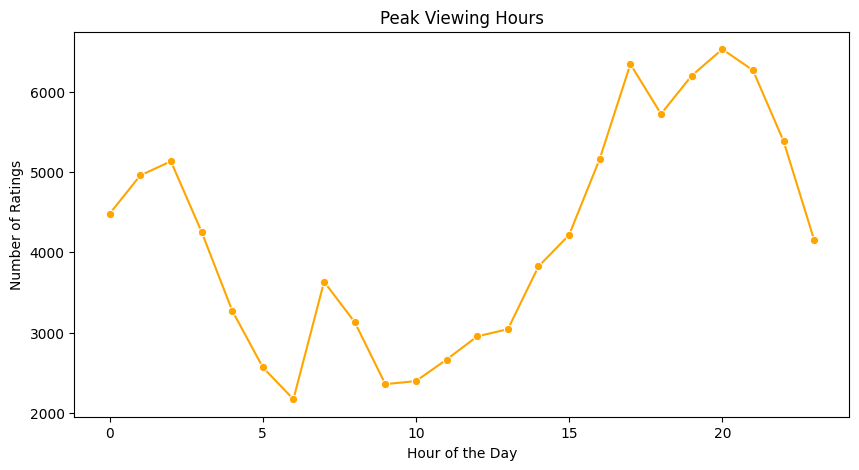

In [14]:
df['hour'] = df['timestamp'].dt.hour
hourly_activity = df.groupby('hour')['rating'].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_activity.index, y=hourly_activity.values, marker='o', color='orange')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Ratings")
plt.title("Peak Viewing Hours")
plt.show()


In [15]:
df['days_since_release'] = (df['timestamp'] - df['timestamp'].min()).dt.days
early_ratings = df[df['days_since_release'] < 7]  # First-week ratings
top_early_movies = early_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

print(top_early_movies)


title
Aladdin (1992)                                         1
Apollo 13 (1995)                                       1
Baby-Sitters Club, The (1995)                          1
Batman (1989)                                          1
Beauty and the Beast (1991)                            1
Beverly Hills Cop III (1994)                           1
Black Beauty (1994)                                    1
Boys on the Side (1995)                                1
Circle of Friends (1995)                               1
City Slickers II: The Legend of Curly's Gold (1994)    1
Name: rating, dtype: int64


In [16]:
hidden_gems = movie_stats[(movie_stats['rating_count'] < 100) & (movie_stats['avg_rating'] > 4.5)]
hidden_gems = hidden_gems.sort_values(by='avg_rating', ascending=False).head(10)

print(hidden_gems)


                                  avg_rating  rating_std  rating_count
title                                                                 
Zeitgeist: Moving Forward (2011)         5.0         NaN             1
'Salem's Lot (2004)                      5.0         NaN             1
12 Angry Men (1997)                      5.0         NaN             1
12 Chairs (1976)                         5.0         NaN             1
20 Million Miles to Earth (1957)         5.0         NaN             1
Wow! A Talking Fish! (1983)              5.0         NaN             1
When Worlds Collide (1951)               5.0         NaN             1
What Men Talk About (2010)               5.0         NaN             1
What Love Is (2007)                      5.0         NaN             1
What Happened Was... (1994)              5.0         NaN             1


In [18]:
user_watch_count = df.groupby('userId')['movieId'].nunique().reset_index()
user_watch_count.columns = ['userId', 'unique_movies_watched']

high_watch_users = user_watch_count[user_watch_count['unique_movies_watched'] > 10]

print(f"Number of users who watched more than 10 unique movies: {len(high_watch_users)}")


Number of users who watched more than 10 unique movies: 610


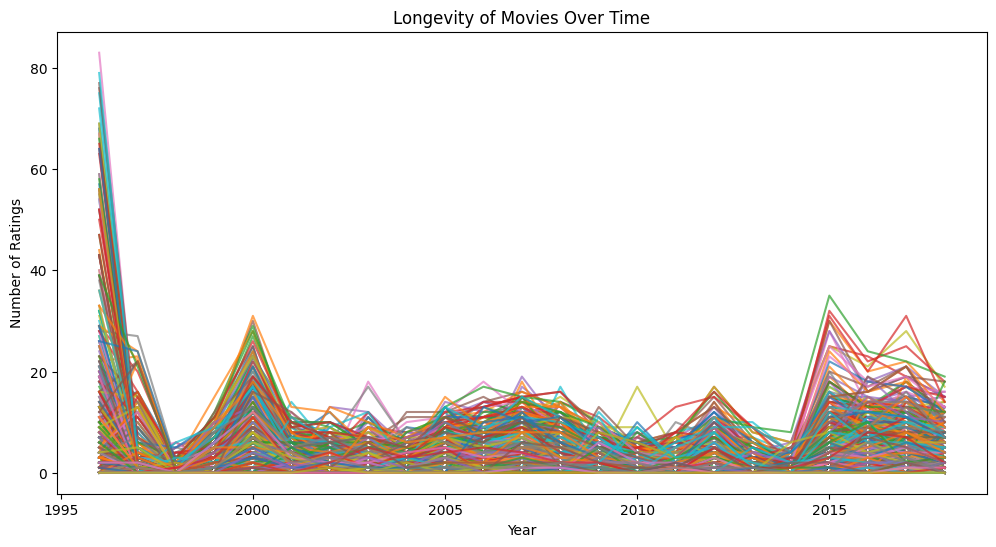

In [19]:
df['year_watched'] = df['timestamp'].dt.year
movie_trends = df.groupby(['title', 'year_watched'])['rating'].count().unstack(fill_value=0)

movie_trends.T.plot(figsize=(12,6), alpha=0.7, legend=False)
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Longevity of Movies Over Time")
plt.show()


In [20]:
tag_ratings = pd.merge(df, tags, on=["userId", "movieId"], how="inner")
tag_analysis = tag_ratings.groupby('tag')['rating'].mean().sort_values(ascending=False)

print(tag_analysis.head(10))


tag
western                         5.0
1990s                           5.0
bible                           5.0
avant-garde romantic comedy     5.0
assassins                       5.0
assassin-in-training (scene)    5.0
arthouse                        5.0
art house                       5.0
bad-ass                         5.0
surrealism                      5.0
Name: rating, dtype: float64


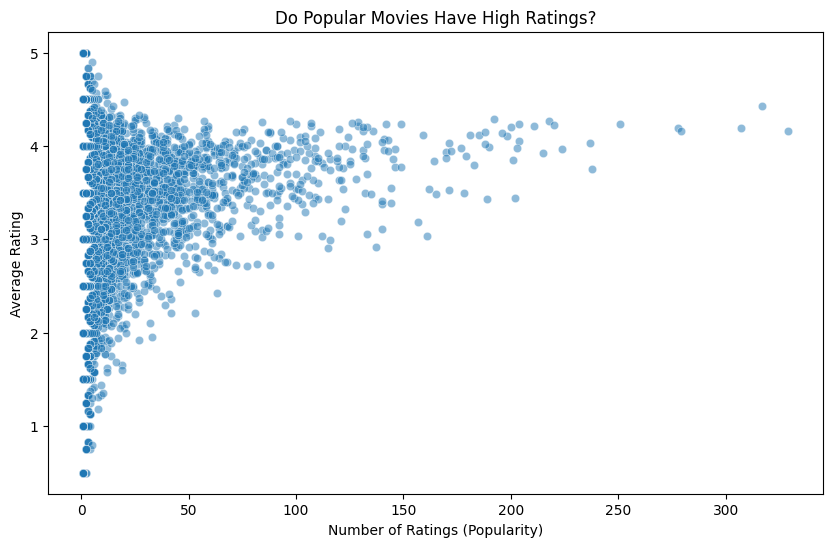

In [21]:
movie_popularity = df.groupby('title')['rating'].agg(['mean', 'count'])
movie_popularity.columns = ['avg_rating', 'rating_count']

plt.figure(figsize=(10,6))
sns.scatterplot(x=movie_popularity['rating_count'], y=movie_popularity['avg_rating'], alpha=0.5)
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.title("Do Popular Movies Have High Ratings?")
plt.show()


In [23]:
df['hour_watched'] = df['timestamp'].dt.hour
df['day_watched'] = df['timestamp'].dt.dayofweek

late_night_movies = df[df['hour_watched'] >= 22].groupby('title')['rating'].count().sort_values(ascending=False).head(10)
weekend_movies = df[df['day_watched'].isin([5, 6])].groupby('title')['rating'].count().sort_values(ascending=False).head(10)

print("Top Late-Night Movies:")
print(late_night_movies)

print("Top Weekend Movies:")
print(weekend_movies)


Top Late-Night Movies:
title
Pulp Fiction (1994)                                  34
Silence of the Lambs, The (1991)                     27
Forrest Gump (1994)                                  25
Matrix, The (1999)                                   25
Shawshank Redemption, The (1994)                     25
Usual Suspects, The (1995)                           23
Seven (a.k.a. Se7en) (1995)                          22
Star Wars: Episode VI - Return of the Jedi (1983)    22
Jurassic Park (1993)                                 20
Star Wars: Episode I - The Phantom Menace (1999)     19
Name: rating, dtype: int64
Top Weekend Movies:
title
Pulp Fiction (1994)                          79
Shawshank Redemption, The (1994)             78
Forrest Gump (1994)                          72
Matrix, The (1999)                           72
Fight Club (1999)                            70
Silence of the Lambs, The (1991)             68
American Beauty (1999)                       62
Star Wars: Episode IV 